In [8]:
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import time 
import geopandas as gpd
import string
import csv
import re
from shapely.geometry import Point, Polygon
# import seaborn as sns
import time 

%matplotlib inline

In [2]:
df = pd.read_csv('210914.metaData.csv', header =0)
df= df.iloc[:, list(range(0,7))]
df.head(100)

/Users/cathy/anaconda3/envs/geo_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ID,Date,Location,Patient Status,Lineage,Age,Gender
0,EPI_ISL_426900,25/3/20,Oceania / Australia / Northern Territory,unknown,B.1,unknown,unknown
1,EPI_ISL_426901,25/3/20,Oceania / Australia / Northern Territory,unknown,B.1,unknown,unknown
2,EPI_ISL_426902,26/3/20,Oceania / Australia / Northern Territory,unknown,B.40,unknown,unknown
3,EPI_ISL_426903,24/3/20,Oceania / Australia / Northern Territory,unknown,B.1.8,unknown,unknown
4,EPI_ISL_426904,24/3/20,Oceania / Australia / Northern Territory,unknown,B.1.8,unknown,unknown
...,...,...,...,...,...,...,...
95,EPI_ISL_424251,23/3/20,North America / USA / Washington,unknown,B.1.371,unknown,unknown
96,EPI_ISL_425582,24/3/20,Europe / United Kingdom / England,unknown,B.1.391,80,Male
97,EPI_ISL_424250,19/3/20,North America / USA / Washington,unknown,A.1,unknown,unknown
98,EPI_ISL_425581,24/3/20,Europe / United Kingdom / England,unknown,B.1.391,82,Male


In [3]:
df.shape

(1048575, 7)

In [4]:
df['Country'] = df['Location'].str.split('/').str[1]
df['Country'] = df['Country'].str.strip()
df

,ID,Date,Location,Patient Status,Lineage,Age,Gender,Country
0,EPI_ISL_426900,25/3/20,Oceania / Australia / Northern Territory,unknown,B.1,unknown,unknown,Australia
1,EPI_ISL_426901,25/3/20,Oceania / Australia / Northern Territory,unknown,B.1,unknown,unknown,Australia
2,EPI_ISL_426902,26/3/20,Oceania / Australia / Northern Territory,unknown,B.40,unknown,unknown,Australia
3,EPI_ISL_426903,24/3/20,Oceania / Australia / Northern Territory,unknown,B.1.8,unknown,unknown,Australia
4,EPI_ISL_426904,24/3/20,Oceania / Australia / Northern Territory,unknown,B.1.8,unknown,unknown,Australia
...,...,...,...,...,...,...,...,...
1048570,EPI_ISL_1532991,15/3/21,Europe / Belgium / Ghent,unknown,B.1.1.7,12,Male,Belgium
1048571,EPI_ISL_1532992,11/3/21,Europe / Belgium / Ghent,unknown,B.1.1.7,45,Female,Belgium
1048572,EPI_ISL_1532993,8/3/21,Europe / Belgium / Ghent,unknown,B.1.1.7,11,Female,Belgium
1048573,EPI_ISL_1532994,10/3/21,Europe / Belgium / Ghent,unknown,B.1.1.7,25,Male,Belgium


In [5]:
df['Country'].unique()

array(['Australia', 'USA', 'United Kingdom', 'Netherlands',
       'Czech Republic', 'Taiwan', 'Luxembourg', 'China', 'India',
       'South Korea', 'Iran', 'Nigeria', 'Mexico', 'Italy', 'Iceland',
       'Thailand', 'Turkey', 'Finland', 'Portugal', 'Hong Kong', 'France',
       'Democratic Republic of the Congo', 'Japan', 'Germany',
       'New Zealand', 'Sweden', 'Belgium', 'Switzerland', 'Spain',
       'Jordan', 'Russia', 'Brazil', 'Sri Lanka', 'Malaysia', 'Colombia',
       'Qatar', 'Lithuania', 'Hungary', 'Kuwait', 'Georgia', 'Argentina',
       'Panama', 'Poland', 'Croatia', 'Vietnam', 'Saudi Arabia', 'Canada',
       'Philippines', 'Slovakia', 'Egypt', 'Uruguay', 'Peru', 'Ireland',
       'Indonesia', 'Chile', 'Latvia', 'Singapore', 'Gambia', 'Slovenia',
       'Denmark', 'Crimea', 'South Africa', 'Estonia', 'Algeria',
       'Greece', 'Senegal', 'Austria', 'Belarus', 'Norway', 'Pakistan',
       'Ecuador', 'Cambodia', 'Nepal', 'Ghana', 'Israel',
       'Canary Islands', 'Costa

In [9]:
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)

In [10]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [11]:
# generate country code  based on country name 
import pycountry 
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
df['code']=alpha3code(df.Country)
df.head()

,ID,Date,Location,Patient Status,Lineage,Age,Gender,Country,code
0,EPI_ISL_426900,25/3/20,Oceania / Australia / Northern Territory,unknown,B.1,unknown,unknown,Australia,AUS
1,EPI_ISL_426901,25/3/20,Oceania / Australia / Northern Territory,unknown,B.1,unknown,unknown,Australia,AUS
2,EPI_ISL_426902,26/3/20,Oceania / Australia / Northern Territory,unknown,B.40,unknown,unknown,Australia,AUS
3,EPI_ISL_426903,24/3/20,Oceania / Australia / Northern Territory,unknown,B.1.8,unknown,unknown,Australia,AUS
4,EPI_ISL_426904,24/3/20,Oceania / Australia / Northern Territory,unknown,B.1.8,unknown,unknown,Australia,AUS


In [12]:
# first let us merge geopandas data with our data
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'code', 'gdp_md_est', 'geometry']
# then merge with our data 
merge=pd.merge(world,df,on='code')
# last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
#merge=merge.merge(location,on='name').sort_values(by='Fatalities',ascending=False).reset_index()
merge

,pop_est,continent,name,code,gdp_md_est,geometry,ID,Date,Location,Patient Status,Lineage,Age,Gender,Country
0,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",EPI_ISL_429806,9/3/20,North America / Canada / New Brunswick,unknown,B.1.147,unknown,unknown,Canada
1,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",EPI_ISL_429807,10/3/20,North America / Canada / Manitoba,unknown,B.6.3,unknown,unknown,Canada
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",EPI_ISL_429811,12/3/20,North America / Canada / New Brunswick,unknown,B.1.147,unknown,unknown,Canada
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",EPI_ISL_429813,15/3/20,North America / Canada / Nova Scotia,unknown,B.1,unknown,unknown,Canada
4,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",EPI_ISL_429812,14/3/20,North America / Canada / Nova Scotia,unknown,B.1,unknown,unknown,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751057,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",EPI_ISL_1498095,19/3/21,South America / Trinidad and Tobago,unknown,R.1,unknown,unknown,Trinidad and Tobago
751058,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",EPI_ISL_1498379,24/3/21,South America / Trinidad and Tobago,unknown,R.1,unknown,unknown,Trinidad and Tobago
751059,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",EPI_ISL_1498262,18/3/21,South America / Trinidad and Tobago,unknown,R.1,unknown,unknown,Trinidad and Tobago
751060,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",EPI_ISL_1499115,21/3/21,South America / Trinidad and Tobago,unknown,B.1,unknown,unknown,Trinidad and Tobago


In [27]:
countrycount = pd.DataFrame(country_dict.items())
countrycount.columns = ['Country','Count']
countrycount['code']=alpha3code(countrycount.Country)
countrycount_df=pd.merge(world,countrycount,on='code')
print(countrycount_df.head())

     pop_est      continent              name code  gdp_md_est  \
0   35623680  North America            Canada  CAN   1674000.0   
1   18556698           Asia        Kazakhstan  KAZ    460700.0   
2   29748859           Asia        Uzbekistan  UZB    202300.0   
3    6909701        Oceania  Papua New Guinea  PNG     28020.0   
4  260580739           Asia         Indonesia  IDN   3028000.0   

                                            geometry           Country  Count  
0  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...            Canada  26811  
1  POLYGON ((87.35997 49.21498, 86.59878 48.54918...        Kazakhstan    172  
2  POLYGON ((55.96819 41.30864, 55.92892 44.99586...        Uzbekistan     28  
3  MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...  Papua New Guinea    425  
4  MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...         Indonesia    992  


Text(0.5, 1.0, 'country count')

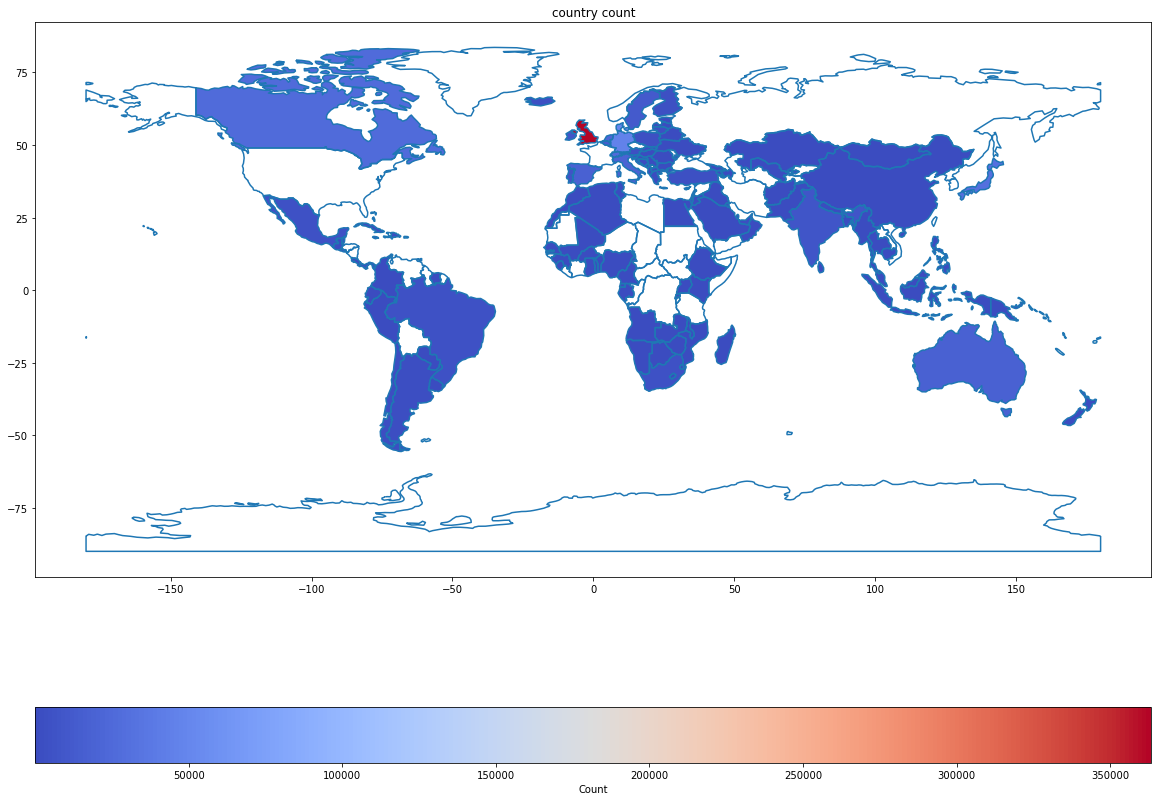

In [30]:
ax = world["geometry"].boundary.plot(figsize=(20,16))
countrycount_df.plot( column="Count", ax=ax, cmap='coolwarm', 
                     legend=True, legend_kwds={"label": "Count", "orientation":"horizontal"})
ax.set_title("country count")

# Median age

['unknown' '49' '23' '35' '71' '42' '67' '69' '41' '84' '81' '52' '54'
 '31' '43' '59' '88' '62' '57' '86' '0' '90' '76' '70' '33' '24' '64' '44'
 '66' '80' '82' '75' '92' '53' '50' '60' '97' '38' '83' '68' '27' '94'
 '32' '45' '30' '72' '51' '37' '21' '22' '20' '73' '56' '25' '79' '48'
 '98' '77' '40' '63' '17' '55' '26' '36' '19' '58' '34' '65' '87' '85'
 '46' '78' '74' '89' '28' '95' '61' '91' '96' '3 months' '39' '47' '29'
 '18' '2' '13' '93' '6' '8' '14' '>60' '16' '101' '1' '6 months' '7' '10'
 '9' '3' '12' '15' '11' '20-30' '4 months' '2 months' '5' '>18' '30-40'
 '99' '55-59' '4' '100' '7 months' 'Oct-20' '50-54' '60-64' '40-44'
 '45-49' '25-29' '70-74' '65-69' '20-24' '35-39' '30-34' '80-84' '40-50'
 '60-70' '8 days' 'B' '102' '>50' '>70' '>80' 'B.1' '5-Sep' '>89' '18-49'
 '50-64' '1 month' '11 months' 'B.1.36.8' 'B.1.210' 'B.6' 'A' 'B.1.143'
 '103' '5 months' 'B.1.441' '>20' '6 weeks' ' at home' 'B.1.1' '10 days'
 ' diarrhea' '8 months' 'A.2' 'Oct-14' '0-4' '75-79' '>85' '9 m

<AxesSubplot:ylabel='Frequency'>

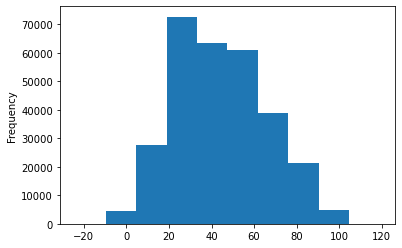

In [32]:
age_df = df[df['Age'].notna()]
#num_df = age_df['Age'].str.isnumeric()
#num_df['Age'] = num_df['Age'].astype(int)

print(age_df['Age'].unique())
age_df[age_df[['Age']].apply(lambda x: x[0].isnumeric(), axis=1)]
age_df = age_df[pd.to_numeric(age_df['Age'], errors='coerce').notnull()]
print(age_df['Age'].unique())

age_df.shape
age_df['Age'] = age_df['Age'].astype(float)
age_df = age_df[age_df.Age < 120]
age_df['Age'].plot.hist()

In [35]:
age_count = {n:g for n,g in age_df.groupby("Country")}
age_count

{'Afghanistan':                      ID     Date            Location Patient Status Lineage  \
 532609  EPI_ISL_1000998  13/6/20  Asia / Afghanistan        unknown  B.1.36   
 532610  EPI_ISL_1000999   7/6/20  Asia / Afghanistan        unknown   B.1.9   
 532612  EPI_ISL_1001001  30/5/20  Asia / Afghanistan        unknown     B.1   
 532613  EPI_ISL_1001002  30/5/20  Asia / Afghanistan        unknown     B.1   
 532615  EPI_ISL_1001004  13/6/20  Asia / Afghanistan        unknown   B.1.9   
 
          Age   Gender      Country code  
 532609  22.0  unknown  Afghanistan  AFG  
 532610  27.0  unknown  Afghanistan  AFG  
 532612  30.0  unknown  Afghanistan  AFG  
 532613  28.0  unknown  Afghanistan  AFG  
 532615  32.0  unknown  Afghanistan  AFG  ,
 'Albania':                      ID      Date                                Location  \
 363065   EPI_ISL_815257    5/9/20  Europe / Albania / Moerfelden-Walldorf   
 825454  EPI_ISL_1299861    1/3/21                        Europe / Albania   

In [36]:
age_uniq = list(age_df['Country'].unique())

age_dict = {}
for country in age_uniq:
    temp_df = age_count[country]
    age_dict[country] = temp_df['Age'].mean()
print(age_dict)

{'Australia': 46.08043461267881, 'United Kingdom': 59.241210604164294, 'Taiwan': 38.28421052631579, 'India': 40.02239413680782, 'Nigeria': 40.21649484536083, 'Iran': 49.12765957446808, 'Mexico': 46.63330148112757, 'Italy': 46.45116607773851, 'Iceland': 37.494330518697225, 'China': 46.94547872340426, 'Turkey': 47.067055393586, 'Finland': 36.477649603460705, 'Portugal': 45.68539325842696, 'Hong Kong': 49.45569620253165, 'Thailand': 40.37692307692308, 'France': 51.00631757005221, 'USA': 40.731571436509114, 'Democratic Republic of the Congo': 40.7617728531856, 'Japan': 53.09792284866469, 'Belgium': 43.88436994809836, 'Switzerland': 47.736450584484594, 'South Korea': 45.028852251109704, 'Spain': 49.31319579847789, 'Russia': 46.811523001339886, 'Brazil': 46.40734674777726, 'Sri Lanka': 40.2312925170068, 'Czech Republic': 46.17196456487754, 'Malaysia': 37.60606060606061, 'Hungary': 50.62355658198614, 'Luxembourg': 42.723724231159174, 'Georgia': 41.333333333333336, 'Argentina': 40.559983700081

In [38]:
avgage = pd.DataFrame(age_dict.items())
avgage.columns = ['Country','Avg Age']
avgage['code']=alpha3code(avgage.Country)
avgage.head()

avgage_df=pd.merge(world,avgage,on='code')

print(avgage_df.head())

     pop_est      continent              name code  gdp_md_est  \
0   35623680  North America            Canada  CAN   1674000.0   
1   18556698           Asia        Kazakhstan  KAZ    460700.0   
2   29748859           Asia        Uzbekistan  UZB    202300.0   
3    6909701        Oceania  Papua New Guinea  PNG     28020.0   
4  260580739           Asia         Indonesia  IDN   3028000.0   

                                            geometry           Country  \
0  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...            Canada   
1  POLYGON ((87.35997 49.21498, 86.59878 48.54918...        Kazakhstan   
2  POLYGON ((55.96819 41.30864, 55.92892 44.99586...        Uzbekistan   
3  MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...  Papua New Guinea   
4  MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...         Indonesia   

     Avg Age  
0  50.314707  
1  33.484375  
2  47.000000  
3  36.574468  
4  40.510352  


Text(0.5, 1.0, 'country average age')

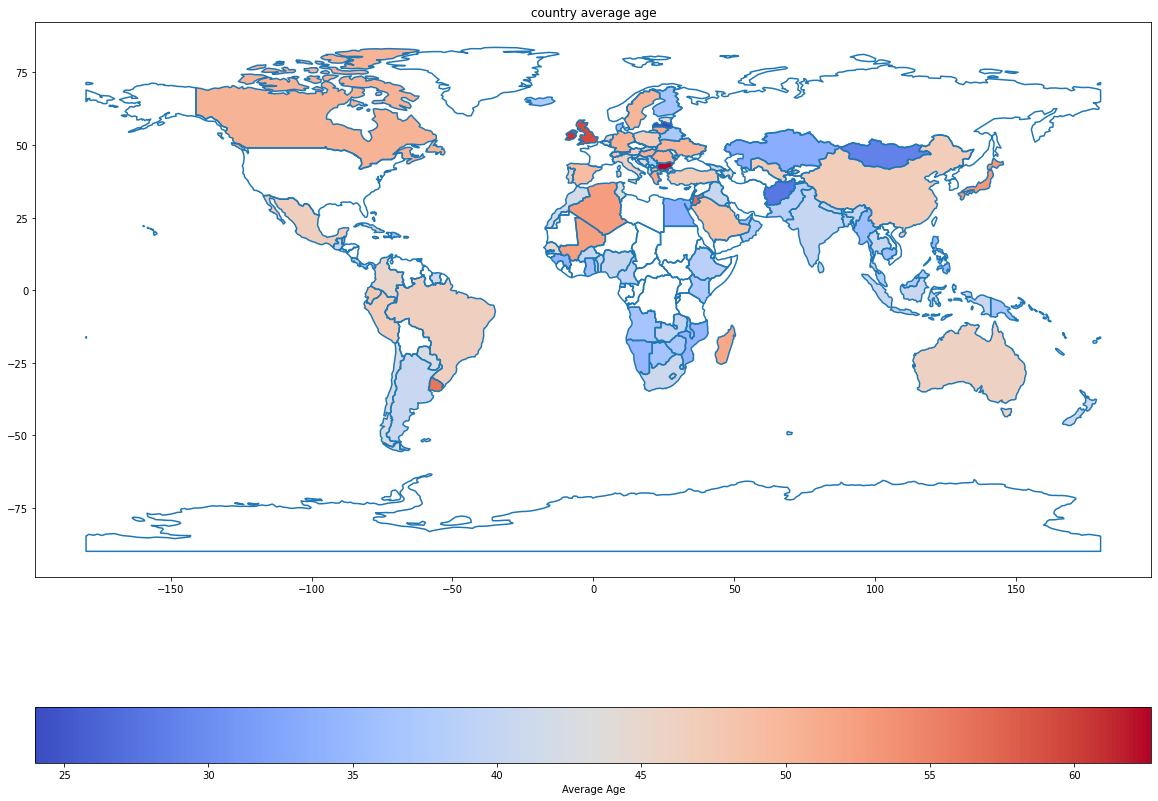

In [39]:
ax = world["geometry"].boundary.plot(figsize=(20,16))
avgage_df.plot( column="Avg Age", ax=ax, cmap='coolwarm', 
                     legend=True, legend_kwds={"label": "Average Age", "orientation":"horizontal"})
ax.set_title("country average age")

In [ ]:
#break down to states/cities in analysis; demographical indicators


In [ ]:
# metadata pre ormicron and later etc; to see if the metadata has been improved; 
#analyse in terms of age, gender, compare with before and after ormicron. (quartly etc) 
#information quality scale? (look up existing ones)

In [40]:
med_df = pd.read_csv('MedianAge.csv', header =0)
med_df
#df= df.iloc[:, list(range(0,7))]
#df.head(100)
med_age = med_df[["Country", "2020"]]
print(med_age.head(5))
agemerge_df=pd.merge(med_age, avgage, on='Country', how='inner')
agemerge_df.head()

       Country    2020
0  Afghanistan  17.810
1      Albania  33.636
2      Algeria  30.333
3       Angola  18.658
4    Argentina  32.837


,Country,2020,Avg Age,code
0,Afghanistan,17.810,27.800000,AFG
1,Albania,33.636,42.916667,ALB
2,Algeria,30.333,52.551724,DZA
3,Angola,18.658,36.514286,AGO
4,Argentina,32.837,40.559984,ARG


In [41]:
med2020_df=pd.merge(world,agemerge_df, on='code')

In [43]:
med2020_df['Nomalisation'] = (med2020_df['Avg Age'] - med2020_df['2020'])/med2020_df['2020']
med2020_df.head()

,pop_est,continent,name,code,gdp_md_est,geometry,Country,2020,Avg Age,Nomalisation
0,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,41.923,50.314707,0.200170
1,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,31.887,33.484375,0.050095
2,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,28.753,47.000000,0.634612
3,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",Papua New Guinea,22.122,36.574468,0.653307
4,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",Indonesia,31.975,40.510352,0.266938


Text(0.5, 1.0, '2020 country median age count')

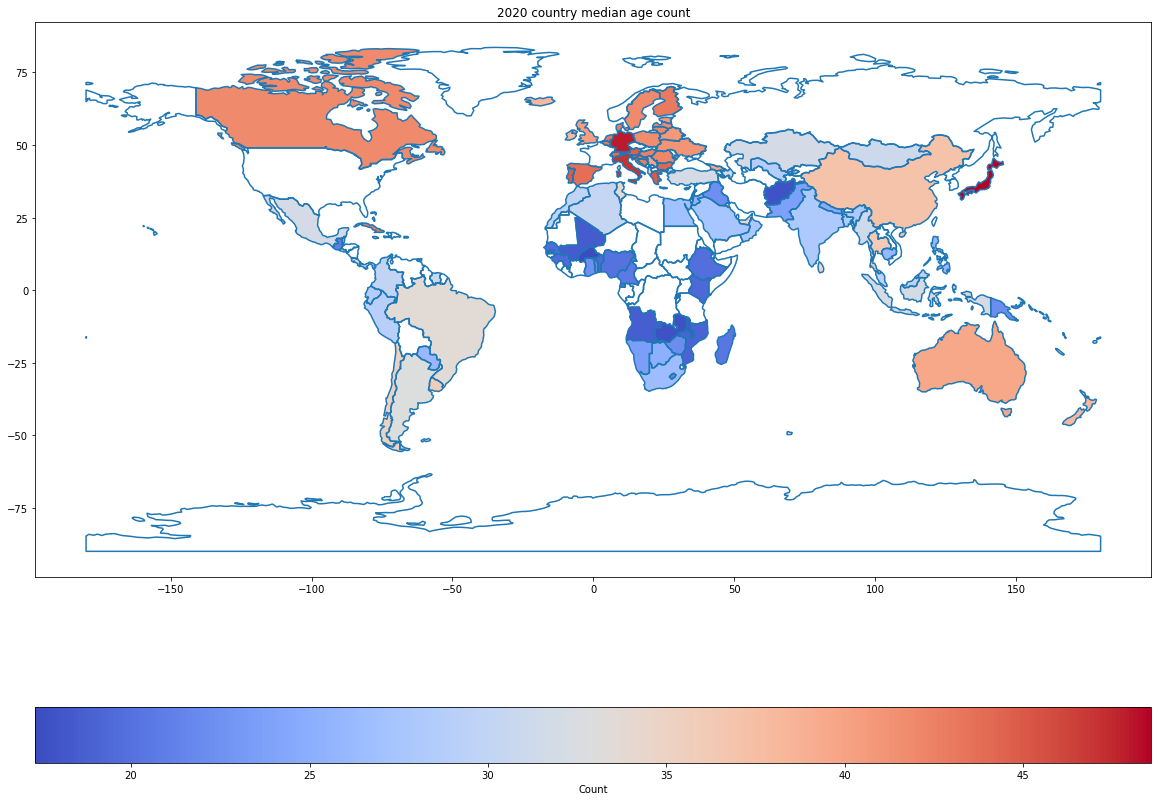

In [42]:
ax = world["geometry"].boundary.plot(figsize=(20,16))
med2020_df.plot( column="2020", ax=ax, cmap='coolwarm', 
                     legend=True, legend_kwds={"label": "Count", "orientation":"horizontal"})
ax.set_title("2020 country median age count")

Text(0.5, 1.0, '2020 country median age count')

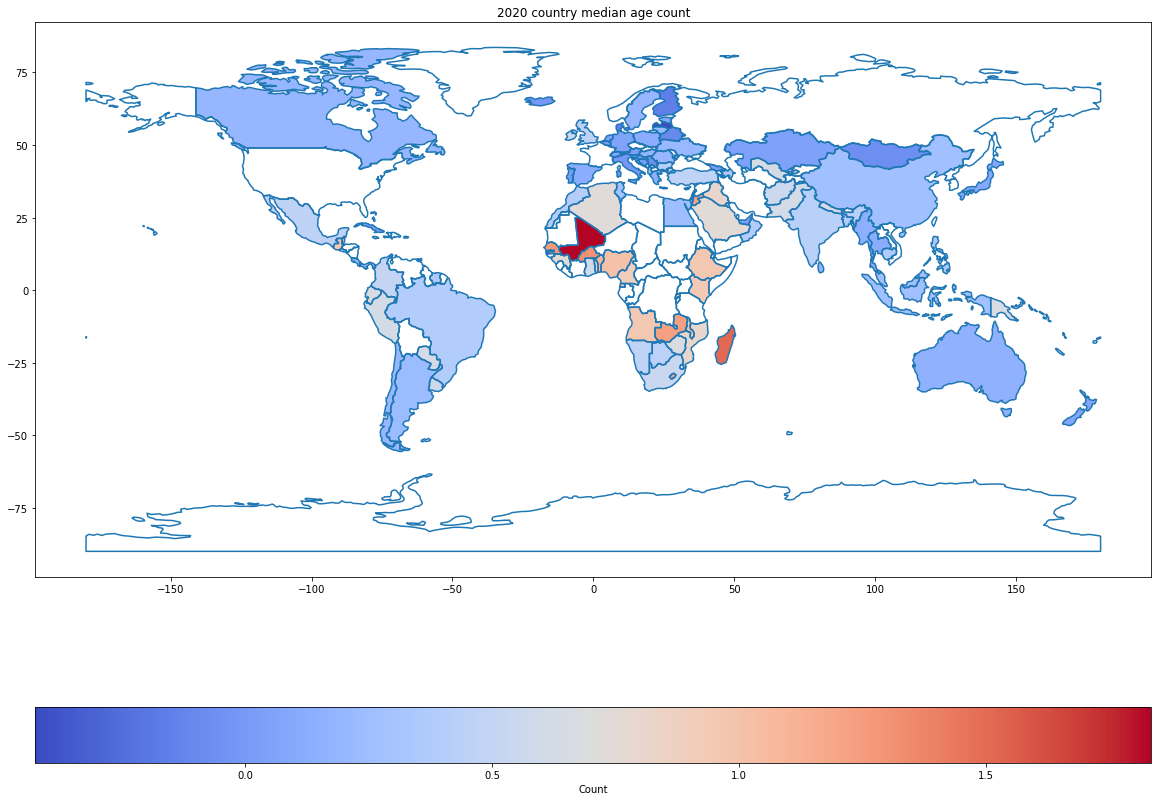

In [44]:
ax = world["geometry"].boundary.plot(figsize=(20,16))
med2020_df.plot( column="Nomalisation", ax=ax, cmap='coolwarm', 
                     legend=True, legend_kwds={"label": "Count", "orientation":"horizontal"})
ax.set_title("2020 country median age count")

In [1]:
# # plot confirmed cases world map 
# merge.plot(scheme="quantiles",
#            figsize=(25, 20),
#            legend=True,cmap='coolwarm')
# plt.title('2020 Jan-May Confirmed Case Amount in Different Countries',fontsize=25)
# # add countries names and numbers 
# for i in range(0,10):
#     plt.text(float(merge.longitude[i]),float(merge.latitude[i]),"{}\n{}".format(merge.name[i],merge.Confirmed_Cases[i]),size=10)
# plt.show()

In [ ]:
#df['code'] = df.apply(lambda row: get_continent(df['Country']), axis = 1)

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
loc_count = df['Location'].value_counts()
print(loc_count)

In [ ]:
fig, ax = plt.subplots()
loc_count.head(10).plot(ax=ax, kind='bar')

In [ ]:
jun_df = df.loc[df['Date'] < "2020-06-30"]
sep_df = df.loc[("2020-06-30" < df['Date']) & (df['Date'] <= "2020-09-30")]
dec_df = df.loc[("2020-09-30" < df['Date']) & (df['Date'] <="2020-12-31")]
mar_df = df.loc[("2020-12-31" < df['Date']) & (df['Date'] <= "2021-03-31")]
jun21_df = df.loc[("2021-03-31" < df['Date']) & (df['Date'] <= "2021-06-30")]

In [ ]:
fig, ax = plt.subplots()
jun_df['Location'].value_counts().head(10).plot(ax=ax, kind='bar')

In [ ]:
fig, ax = plt.subplots()
sep_df['Location'].value_counts().head(10).plot(ax=ax, kind='bar')

In [ ]:
fig, ax = plt.subplots()
sep_df['Gender'].value_counts().head(4).plot(ax=ax, kind='bar')

In [ ]:
fig, ax = plt.subplots()
dec_df['Location'].value_counts().head(10).plot(ax=ax, kind='bar')

In [ ]:
fig, ax = plt.subplots()
mar_df['Location'].value_counts().head(10).plot(ax=ax, kind='bar')

In [ ]:
fig, ax = plt.subplots()
jun21_df['Location'].value_counts().head(10).plot(ax=ax, kind='bar')

In [ ]:
age_df = df[df['Age'].notna()]
#num_df = age_df['Age'].str.isnumeric()
#num_df['Age'] = num_df['Age'].astype(int)
age_df.head(20)

In [ ]:
print(age_df['Age'].unique())

In [ ]:
age_df[age_df[['Age']].apply(lambda x: x[0].isnumeric(), axis=1)]

In [ ]:
age_df = age_df[pd.to_numeric(age_df['Age'], errors='coerce').notnull()]

In [ ]:
print(age_df['Age'].unique())

In [ ]:
age_df.shape
age_df['Age'] = age_df['Age'].astype(float)
age_df = age_df[age_df.Age < 120]

In [ ]:
age_df['Age'].plot.hist()

In [ ]:
%history -g